# 基礎統計（探索的データ解析）
* 学習／テストデータのヒストグラムを確認

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from titanic_package.titanic_plot import plot_train_test_histogram

In [2]:
# Data load
titanic_train = pd.read_csv('./data/train.csv')
titanic_test = pd.read_csv('./data/test.csv')

In [3]:
# 学習/評価データをマージ
titanic_train['Type'] = 'train'
titanic_test['Type'] = 'test'
titanic_test['Survived'] = np.NaN

titanic_all = pd.concat([titanic_train, titanic_test], ignore_index=True, sort=True)
train_flg = titanic_all['Type'] == 'train'
test_flg = titanic_all['Type'] == 'test'

In [4]:
# 集計用の列を追加
titanic_all['Count'] = 1

titanic_all['Ratio'] = 0
titanic_all.loc[train_flg, 'Ratio'] = 1 / sum(train_flg)
titanic_all.loc[test_flg, 'Ratio'] = 1 / sum(test_flg)

In [5]:
# Pclass（1-3）を1st-3rdに変換
pclass_name_list = ['', '1st', '2nd', '3rd']
titanic_all['Pclass_name'] = titanic_all['Pclass'].apply(lambda x : pclass_name_list[x])

# 生存フラグ(Surivived)
* 生存者数: 342人(38%)
* 死亡者数: 549人(62%)
  * およそ1/3の人が生存

In [6]:
feature = 'Survived'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)
print()
print(titanic_all.groupby(feature).sum()[['Count', 'Ratio']])

            train  test
count  891.000000   0.0
mean     0.383838   NaN
std      0.486592   NaN
min      0.000000   NaN
25%      0.000000   NaN
50%      0.000000   NaN
75%      1.000000   NaN
max      1.000000   NaN

          Count     Ratio
Survived                 
0.0         549  0.616162
1.0         342  0.383838


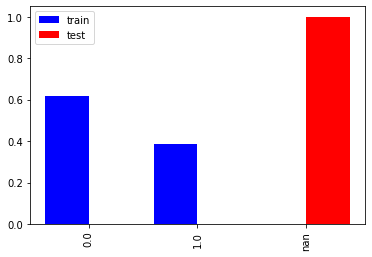

In [7]:
plot_train_test_histogram(feature, titanic_all)

# Passenger Class
* おおよそ1st : 2nd : 3rd = 1 : 1 : 2
* 評価データは学習データと比べ1st, 2ndが1-2%多く、3rdが3%少ない

In [8]:
feature = 'Pclass_name'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

       train test
count    891  418
unique     3    3
top      3rd  3rd
freq     491  218


                   Count     Ratio
Type  Pclass_name                 
test  1st            107  0.255981
      2nd             93  0.222488
      3rd            218  0.521531
train 1st            216  0.242424
      2nd            184  0.206510
      3rd            491  0.551066


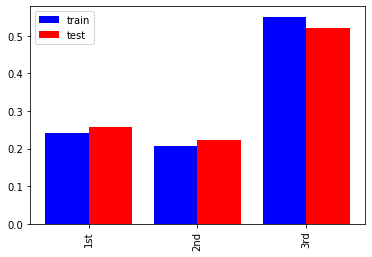

In [9]:
plot_train_test_histogram(feature, titanic_all)
print(titanic_all.groupby(['Type', feature]).sum()[['Count', 'Ratio']])

# 名前(Name)
* すべて異なる値

In [10]:
feature = 'Name'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

                                        train  \
count                                     891   
unique                                    891   
top     Hocking, Mrs. Elizabeth (Eliza Needs)   
freq                                        1   

                                                   test  
count                                               418  
unique                                              418  
top     Bucknell, Mrs. William Robert (Emma Eliza Ward)  
freq                                                  1  


# 性別
* おおよそ男性 : 女性 = 2 : 1
* 評価データは学習データと比べ女性が1%多い

In [11]:
feature = 'Sex'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

       train  test
count    891   418
unique     2     2
top     male  male
freq     577   266


              Count     Ratio
Type  Sex                    
test  female    152  0.363636
      male      266  0.636364
train female    314  0.352413
      male      577  0.647587


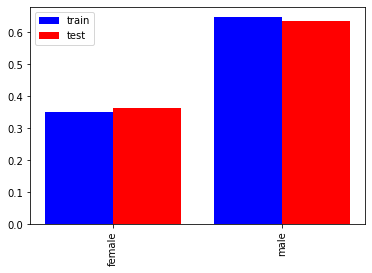

In [12]:
plot_train_test_histogram(feature, titanic_all)
print(titanic_all.groupby(['Type', feature]).sum()[['Count', 'Ratio']])

# 年齢(Age)
* 全体に占める割合では15-40才が多い
* 65才以上は少ないのでまとめた方が良い
* 評価データは学習データと比べ5才未満、15-20才, 30-35才が2%程度少ない
* 逆に20-30才は評価データは学習データと比べ2-3%程度多い

In [13]:
feature = 'Age'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

            train        test
count  714.000000  332.000000
mean    29.699118   30.272590
std     14.526497   14.181209
min      0.420000    0.170000
25%     20.125000   21.000000
50%     28.000000   27.000000
75%     38.000000   39.000000
max     80.000000   76.000000


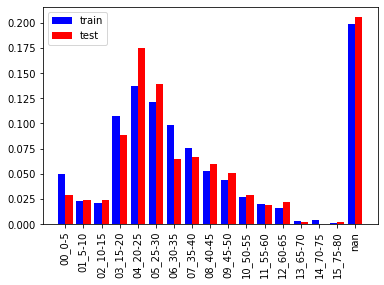

In [14]:
# 5才刻みでplot
age_ctgr_list = np.linspace(0, 85, 18).tolist()
plot_train_test_histogram(feature, titanic_all, age_ctgr_list)

# 一緒に乗船した兄弟、配偶者の数(SibSp)
* 9割以上が0か1
  * 2以上はまとめた方がよい
* 評価データは学習データと比べSibSp=1が3%ほど多く、SibSp>=3が少ない

In [15]:
feature = 'SibSp'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

            train        test
count  891.000000  418.000000
mean     0.523008    0.447368
std      1.102743    0.896760
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      1.000000    1.000000
max      8.000000    8.000000


             Count     Ratio
Type  SibSp                 
test  0        283  0.677033
      1        110  0.263158
      2         14  0.033493
      3          4  0.009569
      4          4  0.009569
      5          1  0.002392
      8          2  0.004785
train 0        608  0.682379
      1        209  0.234568
      2         28  0.031425
      3         16  0.017957
      4         18  0.020202
      5          5  0.005612
      8          7  0.007856


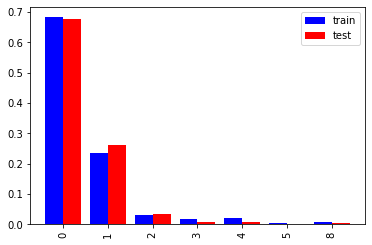

In [16]:
plot_train_test_histogram(feature, titanic_all)
print(titanic_all.groupby(['Type', feature]).sum()[['Count', 'Ratio']])

# 一緒に乗船した親子の数(Parch)
* 95%以上が0-2
* 学習データの最大値は6だが、評価データでの最大値は9
  * 3以上はまとめた方がよい

In [17]:
feature = 'Parch'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

            train        test
count  891.000000  418.000000
mean     0.381594    0.392344
std      0.806057    0.981429
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    0.000000
max      6.000000    9.000000


             Count     Ratio
Type  Parch                 
test  0        324  0.775120
      1         52  0.124402
      2         33  0.078947
      3          3  0.007177
      4          2  0.004785
      5          1  0.002392
      6          1  0.002392
      9          2  0.004785
train 0        678  0.760943
      1        118  0.132435
      2         80  0.089787
      3          5  0.005612
      4          4  0.004489
      5          5  0.005612
      6          1  0.001122


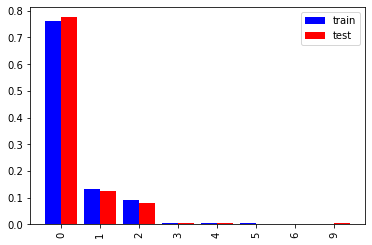

In [18]:
plot_train_test_histogram(feature, titanic_all)
print(titanic_all.groupby(['Type', feature]).sum()[['Count', 'Ratio']])

# Ticket
* 大多数が異なる値

In [19]:
feature = 'Ticket'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

           train      test
count        891       418
unique       681       363
top     CA. 2343  PC 17608
freq           7         5


# 運賃(Fare)
* 裾のながい分布
  * 回帰系のアルゴリズムを使う場合は外れ値の処理が必要

In [20]:
feature = 'Fare'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

            train        test
count  891.000000  417.000000
mean    32.204208   35.627188
std     49.693429   55.907576
min      0.000000    0.000000
25%      7.910400    7.895800
50%     14.454200   14.454200
75%     31.000000   31.500000
max    512.329200  512.329200


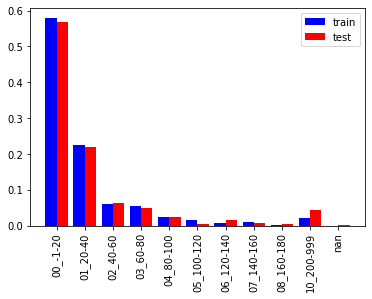

In [21]:
# 20刻みでplot
plot_train_test_histogram(feature, titanic_all, [-1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 999])

# 客室番号(Cabin)
* 大多数が異なる値

In [22]:
feature = 'Cabin'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

       train             test
count    204               91
unique   147               76
top       G6  B57 B59 B63 B66
freq       4                3


# 乗船港(Embarked)
* Sが最も多く7割近くを占める
* 評価データは学習データと比べSが8%ほど少なく、C, Qが4%程度多い

In [23]:
feature = 'Embarked'

stat_df = pd.DataFrame(
    {'train': titanic_all[train_flg][feature].describe(),
     'test': titanic_all[test_flg][feature].describe()
    })
print(stat_df)

       train test
count    889  418
unique     3    3
top        S    S
freq     644  270


                Count     Ratio
Type  Embarked                 
test  C           102  0.244019
      Q            46  0.110048
      S           270  0.645933
train C           168  0.188552
      Q            77  0.086420
      S           644  0.722783


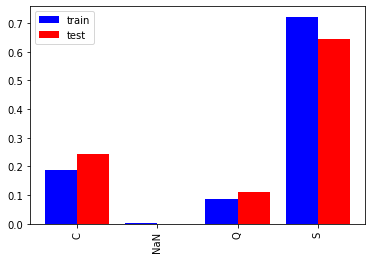

In [24]:
plot_train_test_histogram(feature, titanic_all)
print(titanic_all.groupby(['Type', feature]).sum()[['Count', 'Ratio']])